# JM0250 Data Visualization 
### Academic year 2022-2023

## FIFA World Cup 2022 Data Exploration
Data sources:

- FIFA World Cup 2022 Player Data (https://www.kaggle.com/datasets/swaptr/fifa-world-cup-2022-player-data)
- FIFA World Cup 2022 Match Data (https://www.kaggle.com/datasets/swaptr/fifa-world-cup-2022-match-data)
- FIFA World Cup 2022 Team Data (https://www.kaggle.com/datasets/swaptr/fifa-world-cup-2022-statistics)
- FIFA World Cup 2022 Twitter Dataset (https://www.kaggle.com/datasets/kumari2000/fifa-world-cup-twitter-dataset-2022)
- FIFA World Cup 2022 Prediction (https://www.kaggle.com/datasets/shilongzhuang/soccer-world-cup-challenge)
- FIFA World Cup 2022 Player Images (https://www.kaggle.com/datasets/soumendraprasad/fifa-2022-all-players-image-dataset)
- FIFA World Cup Historic (https://www.kaggle.com/datasets/piterfm/fifa-football-world-cup)
- FIFA World Cup Penalty Shootouts (https://www.kaggle.com/datasets/pablollanderos33/world-cup-penalty-shootouts, https://www.kaggle.com/datasets/jandimovski/world-cup-penalty-shootouts-2022)

Data dictionaries and additional info can be found in the respective data folders.

In [1]:
# Import libraries
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

# Do not truncate tables
pd.set_option('display.max_columns', None)

In [2]:
# Load the data

# Match data
df_match_data = pd.read_csv('../Data/FIFA World Cup 2022 Match Data/data.csv', delimiter=',')

# Player data
df_player_defense       = pd.read_csv('../Data/FIFA World Cup 2022 Player Data/player_defense.csv', delimiter=',')
df_player_gca           = pd.read_csv('../Data/FIFA World Cup 2022 Player Data/player_gca.csv', delimiter=',')
df_player_keepers       = pd.read_csv('../Data/FIFA World Cup 2022 Player Data/player_keepers.csv', delimiter=',')
df_player_keepersadv    = pd.read_csv('../Data/FIFA World Cup 2022 Player Data/player_keepersadv.csv', delimiter=',')
df_player_misc          = pd.read_csv('../Data/FIFA World Cup 2022 Player Data/player_misc.csv', delimiter=',')
df_player_passing       = pd.read_csv('../Data/FIFA World Cup 2022 Player Data/player_passing.csv', delimiter=',')
df_player_passing_types = pd.read_csv('../Data/FIFA World Cup 2022 Player Data/player_passing_types.csv', delimiter=',')
df_player_playingtime   = pd.read_csv('../Data/FIFA World Cup 2022 Player Data/player_playingtime.csv', delimiter=',')
df_player_possession    = pd.read_csv('../Data/FIFA World Cup 2022 Player Data/player_possession.csv', delimiter=',')
df_player_shooting      = pd.read_csv('../Data/FIFA World Cup 2022 Player Data/player_shooting.csv', delimiter=',')
df_player_stats         = pd.read_csv('../Data/FIFA World Cup 2022 Player Data/player_stats.csv', delimiter=',')

# Team data
df_team_data        = pd.read_csv('../Data/FIFA World Cup 2022 Team Data/team_data.csv', delimiter=',')
df_team_group_stats = pd.read_csv('../Data/FIFA World Cup 2022 Team Data/group_stats.csv', delimiter=',')

# Historic data
df_historic_fifa_ranking      = pd.read_csv('../Data/FIFA World Cup Historic/fifa_ranking_2022-10-06.csv', delimiter=',')
df_historic_matches_1930_2022 = pd.read_csv('../Data/FIFA World Cup Historic/matches_1930_2022.csv', delimiter=',')
df_historic_world_cup         = pd.read_csv('../Data/FIFA World Cup Historic/world_cup.csv', delimiter=',')

# Penalty shootouts
df_penalty_shootouts = pd.read_csv('../Data/FIFA World Cup Penalty Shootouts/WorldCupShootouts.csv', delimiter=',')

# Twitter data
df_tweets_01 = pd.read_csv('../Data/FIFA World Cup 2022 Twitter Dataset/tweets1.csv', delimiter=';')
df_tweets_02 = pd.read_csv('../Data/FIFA World Cup 2022 Twitter Dataset/tweets2.csv', delimiter=';')
df_tweets = pd.concat([df_tweets_01, df_tweets_02])

# Prediction data
df_prediction_groups  = pd.read_csv('../Data/FIFA World Cup 2022 Prediction/2022_world_cup_groups.csv', delimiter=',')
df_prediction_matches = pd.read_csv('../Data/FIFA World Cup 2022 Prediction/2022_world_cup_matches.csv', delimiter=',')
df_prediction_international_matches = pd.read_csv('../Data/FIFA World Cup 2022 Prediction/international_matches.csv', delimiter=',')
df_prediction_world_cup_matches = pd.read_csv('../Data/FIFA World Cup 2022 Prediction/world_cup_matches.csv', delimiter=',')
df_prediction_world_cups = pd.read_csv('../Data/FIFA World Cup 2022 Prediction/world_cups.csv', delimiter=',')

# Player images
def list_full_paths(directory):
    return [os.path.join(directory, file) for file in os.listdir(directory)]

def img_reshape(img):
    img = Image.open(img).convert('RGB')
    img = img.resize((300,300))
    img = np.asarray(img)
    return img

def showImages(group, land, player):
    images  = list_full_paths('../Data/FIFA World Cup 2022 Player Images/Images/Images/Group ' + group + '/' + land + ' Players/Images_' + player)
    img_arr = []
    
    for image in images:
        img_arr.append(img_reshape(image))
        
    rows = 5
    cols = 5
    img_count = 0
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=((5,5)))
                             
    for i in range(rows):
        for j in range(cols):
            if img_count < len(img_arr):
                axes[i,j].imshow(img_arr[img_count])
                axes[i,j].axis('off')
                img_count+=1
                
    plt.subplots_adjust(wspace=0, hspace=0)
    

In [3]:
df_player_defense.head() 

,player,position,team,age,birth_year,minutes_90s,tackles,tackles_won,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,dribble_tackles,dribbles_vs,dribble_tackles_pct,dribbled_past,blocks,blocked_shots,blocked_passes,interceptions,tackles_interceptions,clearances,errors
0,Aaron Mooy,MF,Australia,32-094,1990,4.0,9.0,6,4.0,4.0,1.0,6.0,8.0,75.0,2.0,6.0,4.0,2.0,3,12.0,9.0,0.0
1,Aaron Ramsey,MF,Wales,31-357,1990,3.0,2.0,0,0.0,2.0,0.0,0.0,2.0,0.0,2.0,4.0,1.0,3.0,0,2.0,2.0,1.0
2,Abdelhamid Sabiri,MF,Morocco,26-020,1996,2.0,3.0,1,1.0,2.0,0.0,2.0,6.0,33.3,4.0,3.0,1.0,2.0,5,8.0,3.0,0.0
3,Abdelkarim Hassan,DF,Qatar,29-112,1993,3.0,7.0,3,5.0,2.0,0.0,3.0,4.0,75.0,1.0,3.0,1.0,2.0,1,8.0,5.0,0.0
4,Abderrazak Hamdallah,FW,Morocco,32-001,1990,0.8,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0.0,2.0,0.0


In [4]:
df = df_player_defense
country = 'France'
France_defense = df[df['team'] == country]
country = 'Argentina'
Arg_defense = df[df['team'] == country]

df = df_player_possession
country = 'France'
France_poss = df[df['team'] == country]
country = 'Argentina'
Arg_poss = df[df['team'] == country]

df = df_player_misc
country = 'France'
France_misc = df[df['team'] == country]
country = 'Argentina'
Arg_misc = df[df['team'] == country]

df = df_player_passing
country = 'France'
France_pass = df[df['team'] == country]
country = 'Argentina'
Arg_pass = df[df['team'] == country]



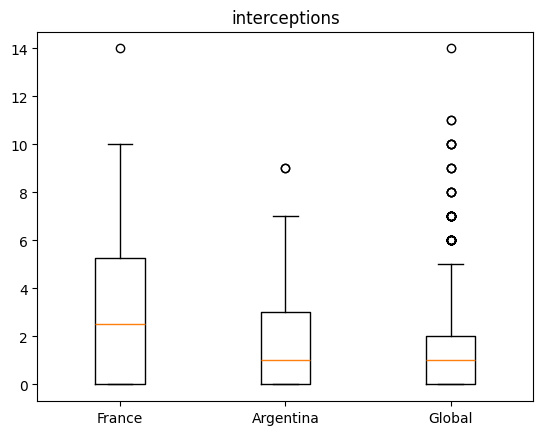

In [5]:
for var in ['interceptions']:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.boxplot([France_defense[var].dropna(), Arg_defense[var].dropna(), df_player_defense[var].dropna()])
    ax.set_xticklabels(['France', 'Argentina', 'Global'])
    plt.title(var);


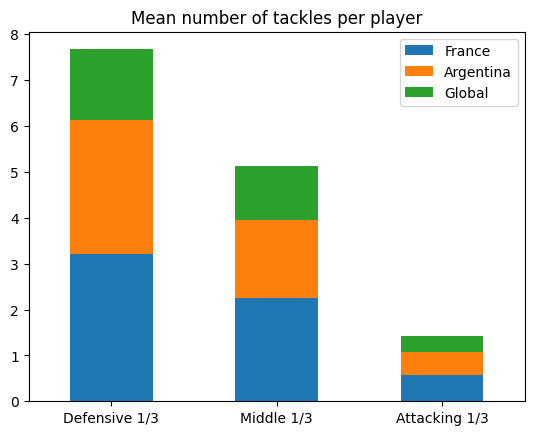

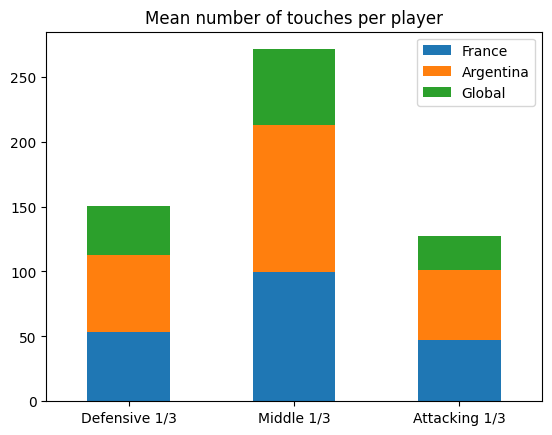

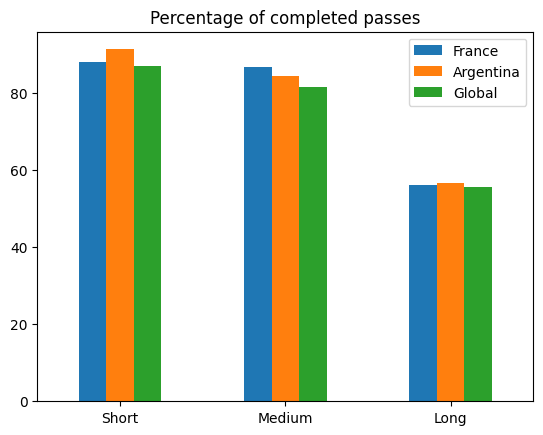

In [6]:
x = []
y = []
z = []
for var in ['tackles_def_3rd', 'tackles_mid_3rd', 'tackles_att_3rd']:
    x.append(France_defense[var].dropna().mean())
    y.append(Arg_defense[var].dropna().mean())
    z.append(df_player_defense[var].dropna().mean())
index = ['Defensive 1/3', 'Middle 1/3', 'Attacking 1/3']
df = pd.DataFrame({'France': x, 'Argentina': y, 'Global': z}, index=index)
ax = df.plot.bar(rot=0, stacked=True)
plt.title('Mean number of tackles per player');


x = []
y = []
z = []
for var in ['touches_def_3rd', 'touches_mid_3rd', 'touches_att_3rd']:
    x.append(France_poss[var].dropna().mean())
    y.append(Arg_poss[var].dropna().mean())
    z.append(df_player_possession[var].dropna().mean())
index = ['Defensive 1/3', 'Middle 1/3', 'Attacking 1/3']
df = pd.DataFrame({'France': x, 'Argentina': y, 'Global': z}, index=index)
ax = df.plot.bar(rot=0, stacked=True)
plt.title('Mean number of touches per player');

x = []
y = []
z = []
for var in ['passes_pct_short', 'passes_pct_medium', 'passes_pct_long']:
    x.append(France_pass[var].dropna().mean())
    y.append(Arg_pass[var].dropna().mean())
    z.append(df_player_passing[var].dropna().mean())
index = ['Short', 'Medium', 'Long']
df = pd.DataFrame({'France': x, 'Argentina': y, 'Global': z}, index=index)
ax = df.plot.bar(rot=0)
plt.title('Percentage of completed passes');

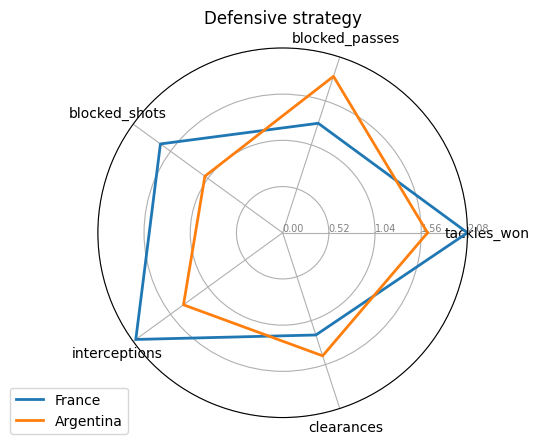

In [7]:
data = {}
for var in ['tackles_won', 'blocked_passes', 'blocked_shots', 'interceptions', 'clearances']:
    data[var] = [France_defense[var].dropna().mean()/df_player_defense[var].dropna().mean(),  Arg_defense[var].dropna().mean()/df_player_defense[var].dropna().mean()]
countries = ['France', 'Argentina']
df = pd.DataFrame(data, index=countries)


# Number of variables
categories = list(df)
N = len(categories)

# What will be the angle of each axis in the plot
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

# Radar plot setup
ax = plt.subplot(111, polar=True)

max_value = df.values.max()
y_ticks = np.linspace(0, max_value, 5)  
y_tick_labels = [f"{tick:.2f}" for tick in y_ticks]  # format ticks as strings

ax.set_rlabel_position(0)
plt.yticks(y_ticks, y_tick_labels, color="grey", size=7)
plt.ylim(0, max_value)

# Draw one axe per variable and add labels
plt.xticks(angles[:-1], categories)

# Plot each country
for country in df.index:
    values = df.loc[country].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=country)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title('Defensive strategy')
plt.show()

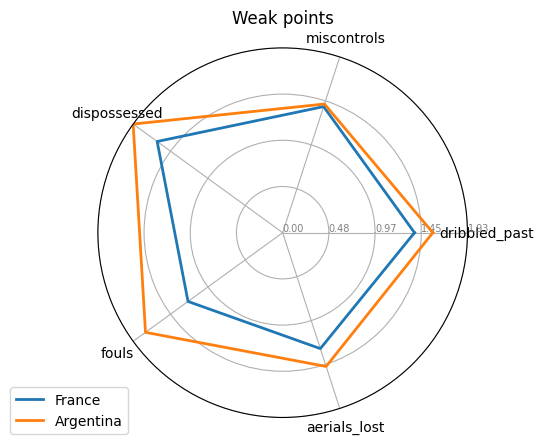

In [8]:
data = {}
for var in ['dribbled_past']:
    data[var] = [France_defense[var].dropna().mean()/df_player_defense[var].dropna().mean(),  Arg_defense[var].dropna().mean()/df_player_defense[var].dropna().mean()]
for var in ['miscontrols', 'dispossessed']:
    data[var] = [France_poss[var].dropna().mean()/df_player_possession[var].dropna().mean(),  Arg_poss[var].dropna().mean()/df_player_possession[var].dropna().mean()]
for var in ['fouls', 'aerials_lost']:
    data[var] = [France_misc[var].dropna().mean()/df_player_misc[var].dropna().mean(),  Arg_misc[var].dropna().mean()/df_player_misc[var].dropna().mean()]

countries = ['France', 'Argentina']
df = pd.DataFrame(data, index=countries)


# Number of variables
categories = list(df)
N = len(categories)

# What will be the angle of each axis in the plot
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

# Radar plot setup
ax = plt.subplot(111, polar=True)

max_value = df.values.max()
y_ticks = np.linspace(0, max_value, 5)  
y_tick_labels = [f"{tick:.2f}" for tick in y_ticks]  # format ticks as strings

ax.set_rlabel_position(0)
plt.yticks(y_ticks, y_tick_labels, color="grey", size=7)
plt.ylim(0, max_value)

# Draw one axe per variable and add labels
plt.xticks(angles[:-1], categories)

# Plot each country
for country in df.index:
    values = df.loc[country].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=country)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title('Weak points')
plt.show()